Technology: Apple

consumer goods: Coca-Cola

Energy: Exxon Mobil

Real Estate: Simon Property

Healthcare: Johnson and Johnson

Automobile: Toyota

In [5]:
!pip install mplfinance
!pip install pandas
!pip install numpy
!pip install yfinance
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas.plotting as pd_plot
import mplfinance as mpf
import json

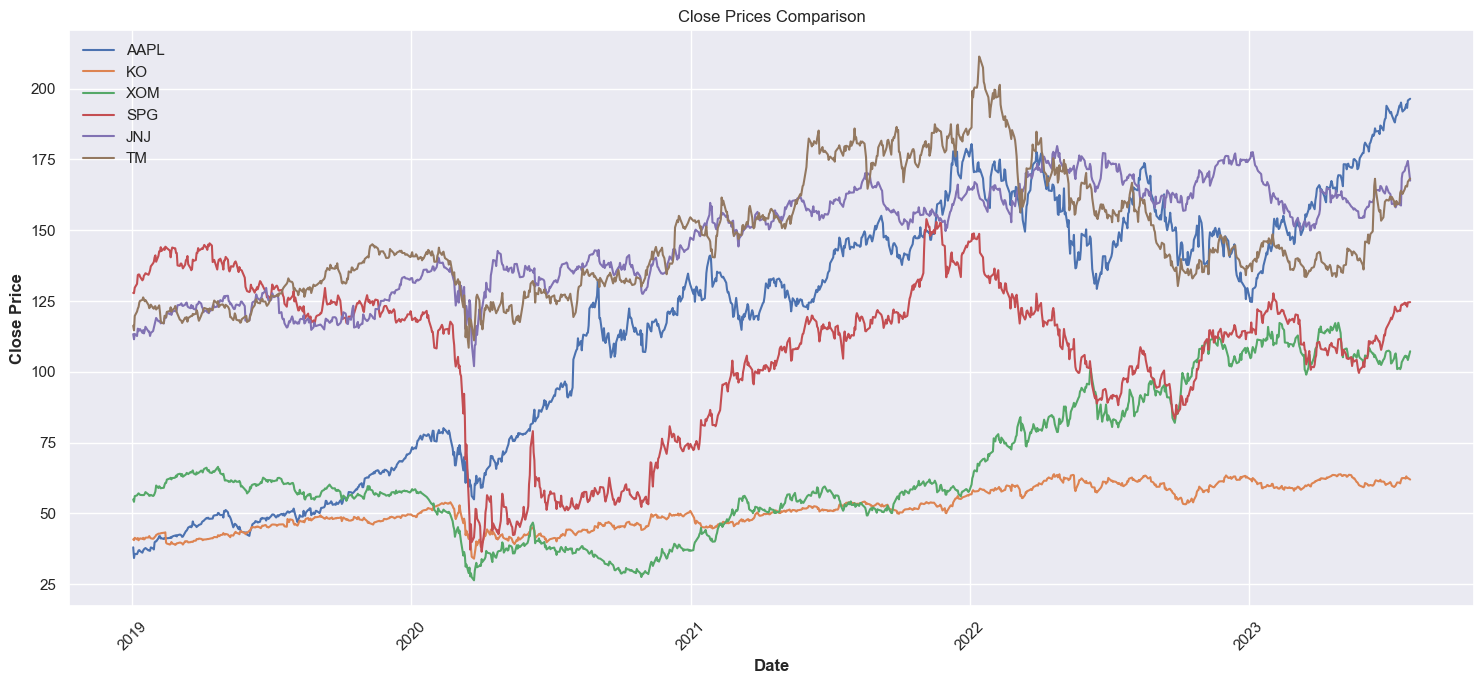

In [61]:
# Define the list of ticker symbols for the companies
ticker_symbols = ["AAPL", "KO", "XOM", "SPG", "JNJ", "TM"]

# Define the start and end dates for the desired period
start_date = "2019-01-01"
end_date = "2023-12-31"

# Create an empty dictionary to store the stock data for each company
stock_data = {}

# Retrieve the stock data for each ticker symbol and store it in the dictionary
for symbol in ticker_symbols:
    ticker = yf.Ticker(symbol)
    stock_data[symbol] = ticker.history(start=start_date, end=end_date)["Close"]

#####################################-- EXTRACT DATA FOR FLASK --##################################
# Convert the stock_data dictionary to a format that can be converted to JSON
json_ready_data = {}
for symbol, series_data in stock_data.items():
    json_ready_data[symbol] = [{'date': str(date), 'close': close} for date, close in series_data.items()]

# Convert the JSON-ready data to a JSON string
stock_data_json = json.dumps(json_ready_data)

# Write the JSON data to a JavaScript file
with open('./static/' +'closedata.js', 'w') as js_file:
    js_file.write(f'const stockData = {stock_data_json};')
###################################################################################################

# Create the plot
plt.figure(figsize=(15, 7))

# Plot the close prices for each company
for symbol in ticker_symbols:
    plt.plot(stock_data[symbol], label=symbol)

# Set the plot title and axis labels
plt.title("Close Prices Comparison")
plt.xlabel("Date")
plt.ylabel("Close Price")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


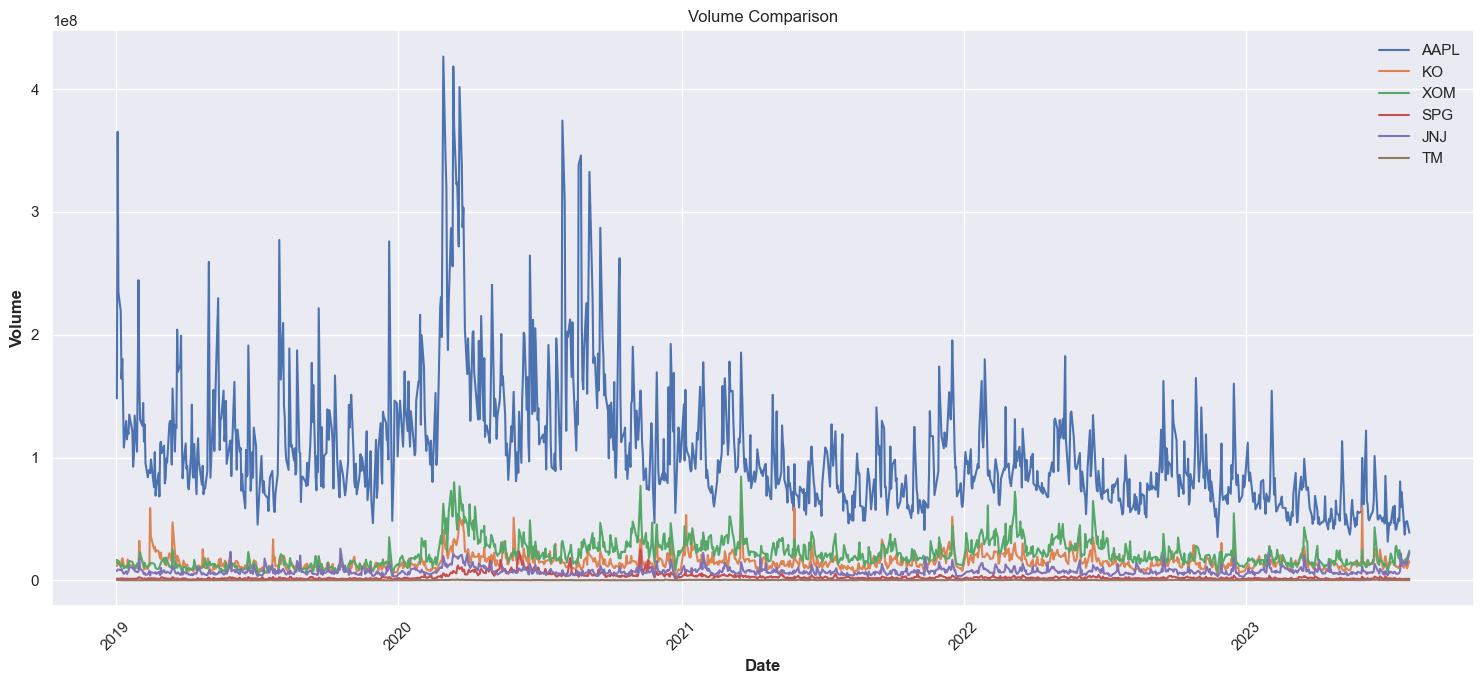

In [62]:
# Create an empty dictionary to store the stock data for each company
stock_data = {}

ticker_symbols = ["AAPL", "KO", "XOM", "SPG", "JNJ", "TM"]
#ticker_symbols = ["SPG","TM"]
# Retrieve the stock data for each ticker symbol and store it in the dictionary
for symbol in ticker_symbols:
    ticker = yf.Ticker(symbol)
    stock_data[symbol] = ticker.history(start=start_date, end=end_date)["Volume"]

#####################################-- EXTRACT DATA FOR FLASK --##################################
# Convert the stock_data dictionary to a format that can be converted to JSON
json_ready_data = {}
for symbol, series_data in stock_data.items():
    json_ready_data[symbol] = [{'date': str(date), 'volume': volume} for date, volume in series_data.items()]

# Convert the JSON-ready data to a JSON string
stock_data_json = json.dumps(json_ready_data)

# Write the JSON data to a JavaScript file
with open('./static/' +'volumedata.js', 'w') as js_file:
    js_file.write(f'const stockData = {stock_data_json};')
###################################################################################################
    
# Create the plot
plt.figure(figsize=(15, 7))

# Plot the close prices for each company
for symbol in ticker_symbols:
    plt.plot(stock_data[symbol], label=symbol)

# Set the plot title and axis labels
plt.title("Volume Comparison")
plt.xlabel("Date")
plt.ylabel("Volume")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
# Find the top 5 highest volume dates for each stock
top5_dates = {}

for symbol, data in stock_data.items():
    sorted_dates = data.sort_values(ascending=False).index[:5]
    top5_dates[symbol] = sorted_dates

# Print the top 5 highest volume dates for each stock
for symbol, dates in top5_dates.items():
    print(f"Top 5 highest volume dates for {symbol}:")
    for date in dates:
        print(date.strftime("%Y-%m-%d"))
    print()

Top 5 highest volume dates for AAPL:
2020-02-28
2020-03-12
2020-03-20
2020-07-31
2020-03-13

Top 5 highest volume dates for KO:
2021-03-19
2023-05-31
2021-05-27
2019-02-14
2021-01-07

Top 5 highest volume dates for XOM:
2021-03-19
2020-03-13
2020-11-09
2020-03-20
2020-03-09

Top 5 highest volume dates for SPG:
2020-11-09
2020-06-05
2020-08-10
2020-06-04
2020-06-03

Top 5 highest volume dates for JNJ:
2019-10-18
2023-01-30
2019-05-29
2021-01-29
2023-07-20

Top 5 highest volume dates for TM:
2021-02-10
2022-01-04
2023-06-14
2023-06-13
2021-03-18



In [10]:
# Check for matching dates among the top 5 dates for different companies
matching_dates = []

for i, symbol in enumerate(ticker_symbols):
    dates_to_check = top5_dates[symbol]
    for j in range(i + 1, len(ticker_symbols)):
        other_symbol = ticker_symbols[j]
        other_dates = top5_dates[other_symbol]
        common_dates = list(set(dates_to_check) & set(other_dates))
        if common_dates:
            matching_dates.append((symbol, other_symbol, common_dates))

# Print the matching dates
for symbol1, symbol2, dates in matching_dates:
    print(f"Matching dates between {symbol1} and {symbol2}:")
    for date in dates:
        print(date.date())
    print()

Matching dates between AAPL and XOM:
2020-03-20
2020-03-13

Matching dates between KO and XOM:
2021-03-19

Matching dates between XOM and SPG:
2020-11-09



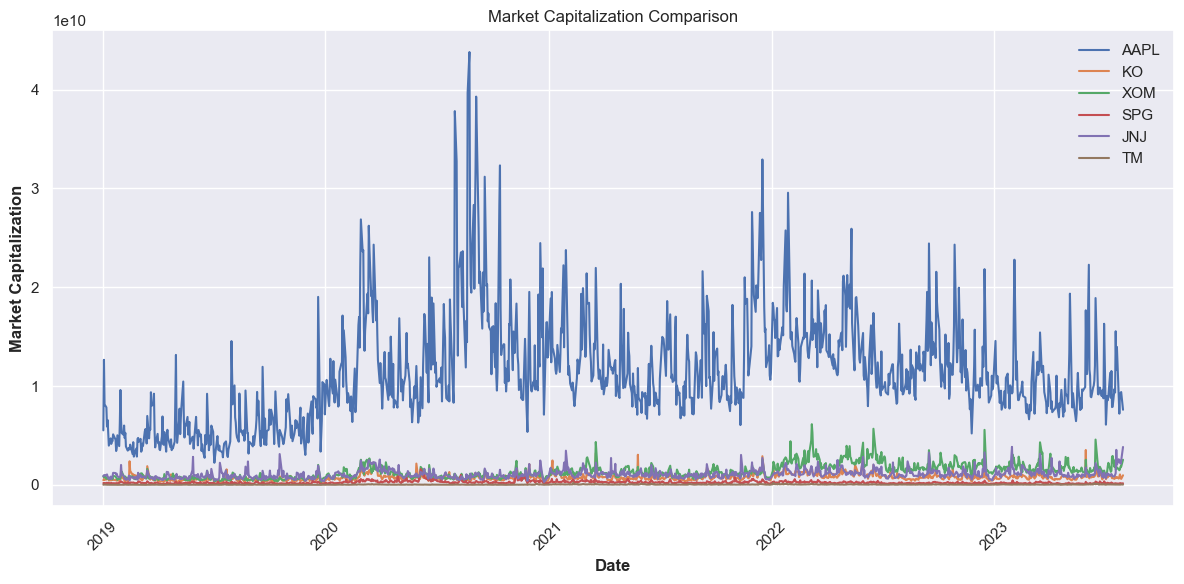

In [63]:
# Define the list of ticker symbols for the companies
ticker_symbols = ["AAPL","KO", "XOM", "SPG", "JNJ", "TM"]
#ticker_symbols = ["KO", "XOM", "SPG", "JNJ", "TM"]
#ticker_symbols = ["KO","SPG", "JNJ", "TM"]
# Define the start and end dates for the desired period
start_date = "2019-01-01"
end_date = "2023-12-31"

# Create an empty dictionary to store the stock data for each company
stock_data = {}

# Retrieve the stock data for each ticker symbol and store it in the dictionary
for symbol in ticker_symbols:
    ticker = yf.Ticker(symbol)
    stock_data[symbol] = ticker.history(start=start_date, end=end_date)

# Calculate the market capitalization for each company
market_caps = {}

for symbol, data in stock_data.items():
    data["MarketCap"] = data["Open"] * data["Volume"]
    market_caps[symbol] = data["MarketCap"]


#####################################-- EXTRACT DATA FOR FLASK --##################################
json_ready_data = {}
# Convert the stock_data dictionary to a format that can be converted to JSON
for symbol, market_cap in market_caps.items():
    json_ready_data[symbol] = [{'date': str(date), 'MarketCap': value} for date, value in market_cap.items()]
    
# Convert the JSON-ready data to a JSON string
stock_data_json = json.dumps(json_ready_data)

# Write the JSON data to a JavaScript file
with open('./static/' +'marketCapdata.js', 'w') as js_file:
    js_file.write(f'const stockData = {stock_data_json};')
###################################################################################################

# Plot the market capitalization for each company
plt.figure(figsize=(12, 6))

for symbol, market_cap in market_caps.items():
    plt.plot(market_cap, label=symbol)

plt.title("Market Capitalization Comparison")
plt.xlabel("Date")
plt.ylabel("Market Capitalization")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

{'AAPL': Date
2019-01-02 00:00:00-05:00           NaN
2019-01-03 00:00:00-05:00           NaN
2019-01-04 00:00:00-05:00           NaN
2019-01-07 00:00:00-05:00           NaN
2019-01-08 00:00:00-05:00           NaN
                                ...    
2023-07-25 00:00:00-04:00    189.299999
2023-07-26 00:00:00-04:00    189.657000
2023-07-27 00:00:00-04:00    189.987333
2023-07-28 00:00:00-04:00    190.383333
2023-07-31 00:00:00-04:00    190.731333
Name: Close, Length: 1152, dtype: float64, 'KO': Date
2019-01-02 00:00:00-05:00          NaN
2019-01-03 00:00:00-05:00          NaN
2019-01-04 00:00:00-05:00          NaN
2019-01-07 00:00:00-05:00          NaN
2019-01-08 00:00:00-05:00          NaN
                               ...    
2023-07-25 00:00:00-04:00    60.875600
2023-07-26 00:00:00-04:00    60.985437
2023-07-27 00:00:00-04:00    61.067000
2023-07-28 00:00:00-04:00    61.136333
2023-07-31 00:00:00-04:00    61.159667
Name: Close, Length: 1152, dtype: float64, 'XOM': Date
2019-01-

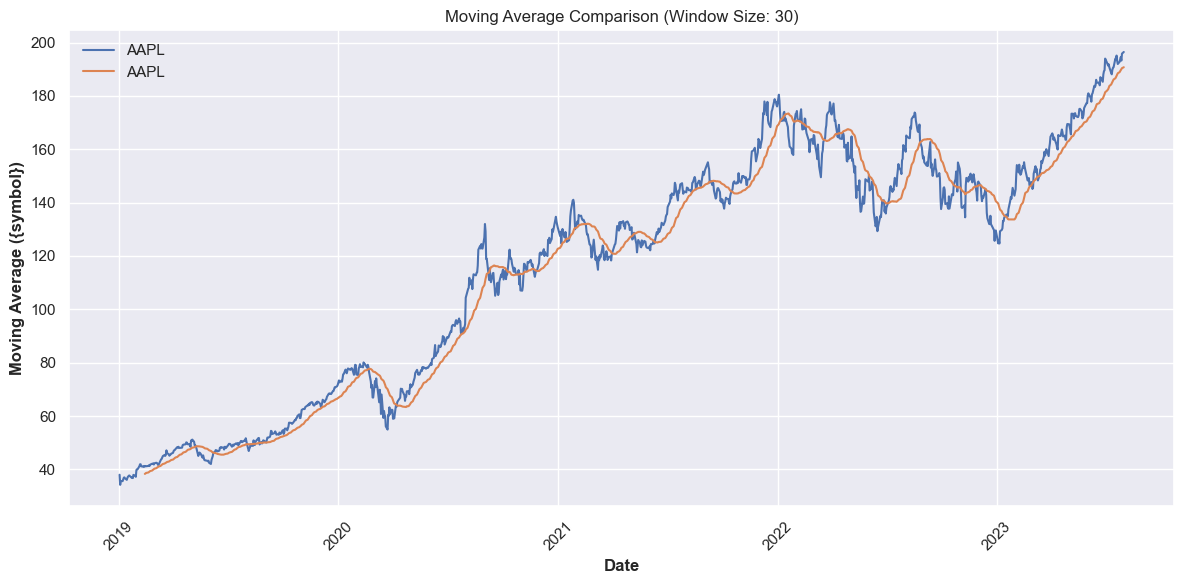

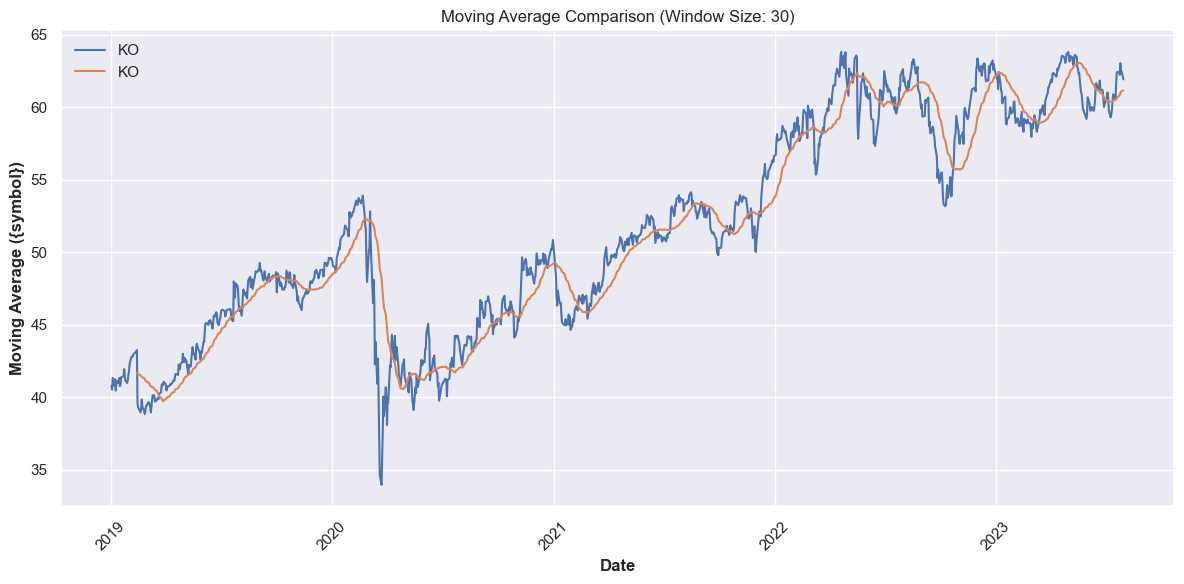

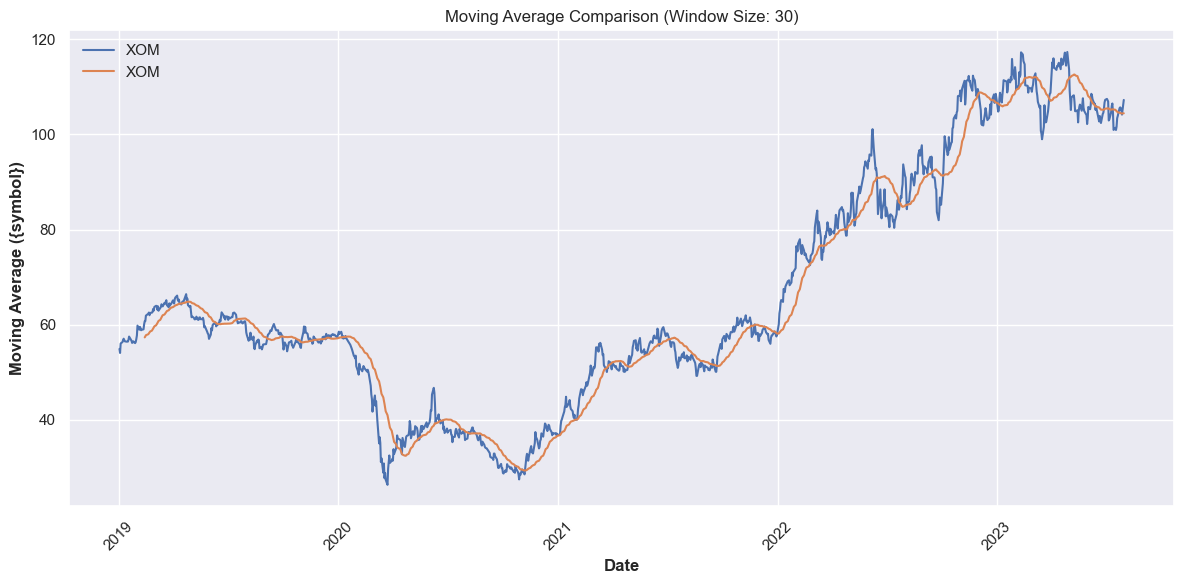

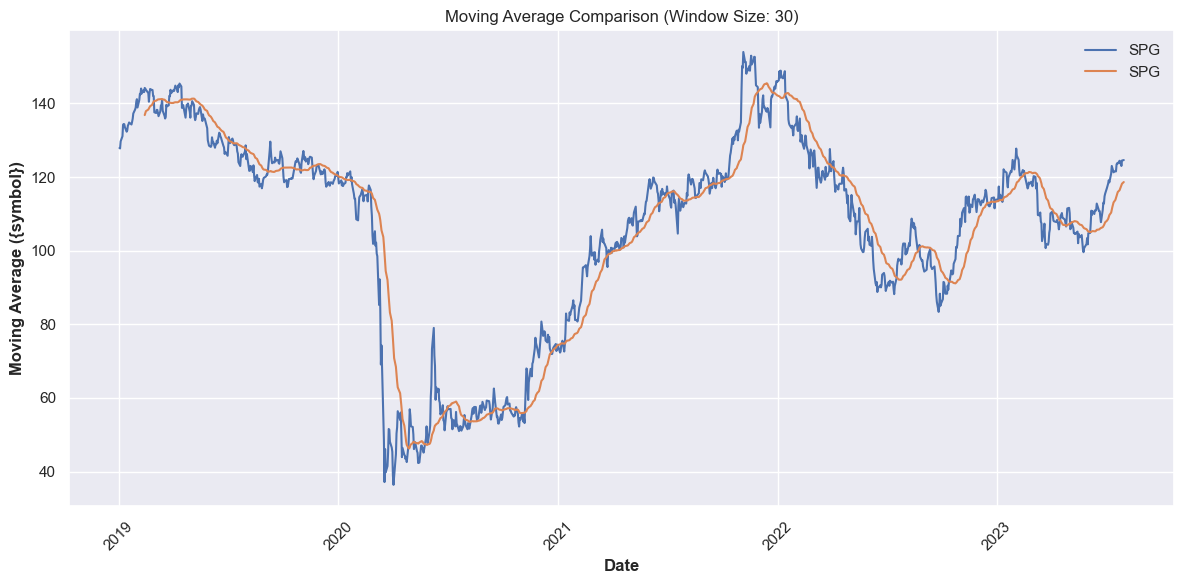

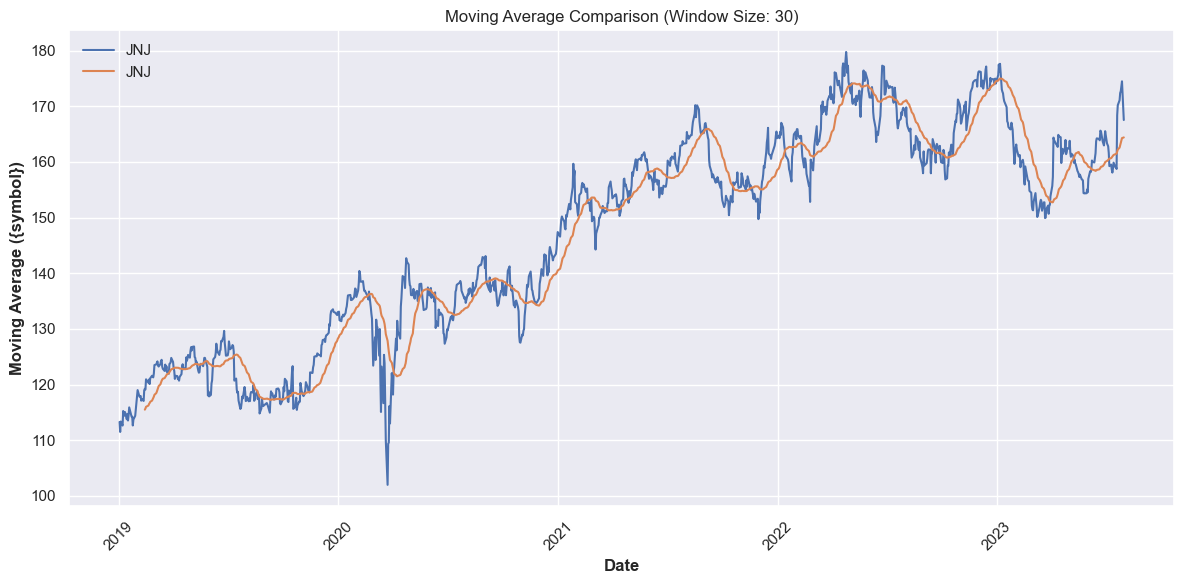

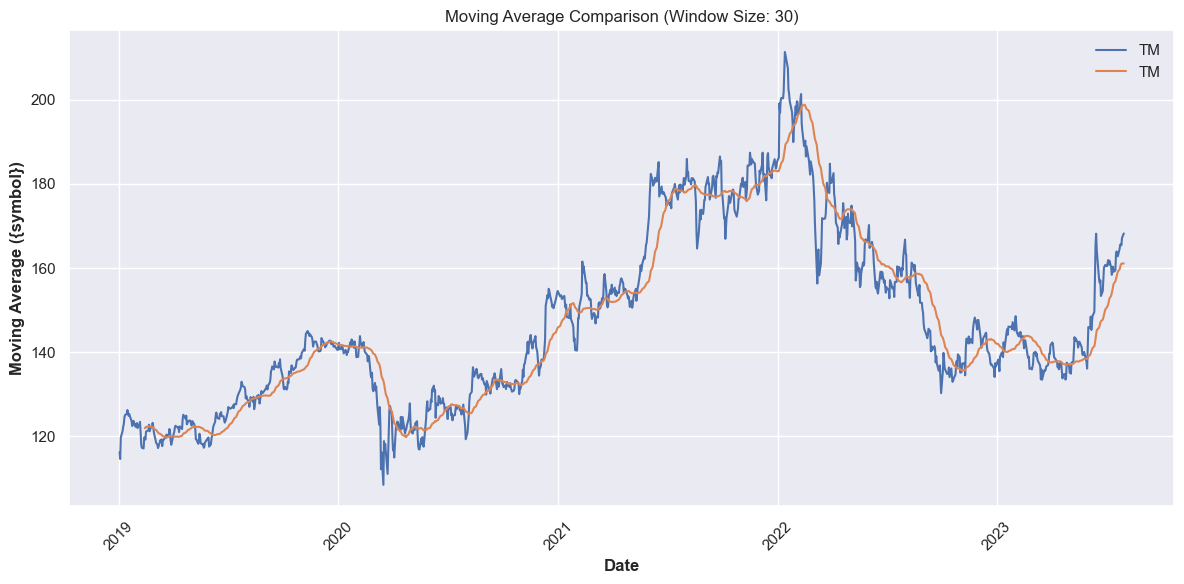

In [65]:
# Define the window size for the moving average
window_size = 30

# Create an empty dictionary to store the stock data for each company
stock_data = {}

# Retrieve the stock data for each ticker symbol and store it in the dictionary
for symbol in ticker_symbols:
    ticker = yf.Ticker(symbol)
    stock_data[symbol] = ticker.history(start=start_date, end=end_date)["Close"]

# Calculate the moving average for each company
moving_averages = {}

for symbol, adj_close_prices in stock_data.items():
    moving_averages[symbol] = adj_close_prices.rolling(window=window_size).mean()

#####################################-- EXTRACT DATA FOR FLASK --##################################
json_ready_data = {}
# Convert the stock_data dictionary to a format that can be converted to JSON
for symbol, moving_average in moving_averages.items():
    json_ready_data[symbol] =[{'date': str(date), 'moving_average': value} if not pd.isna(value) else {'date': str(date), 'moving_average': None} for date, value in moving_average.items()]
    
# Convert the JSON-ready data to a JSON string
stock_data_json = json.dumps(json_ready_data)

# Write the JSON data to a JavaScript file
with open('./static/' +'movingAverage.js', 'w') as js_file:
    js_file.write(f'const stockData = {stock_data_json};')
###################################################################################################

# Plot the moving average for each company
for symbol, moving_average in moving_averages.items():
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data[symbol], label=symbol)
    plt.plot(moving_average, label=symbol)

    plt.title(f"Moving Average Comparison (Window Size: {window_size})")
    plt.xlabel("Date")
    plt.ylabel("Moving Average ({symbol})")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

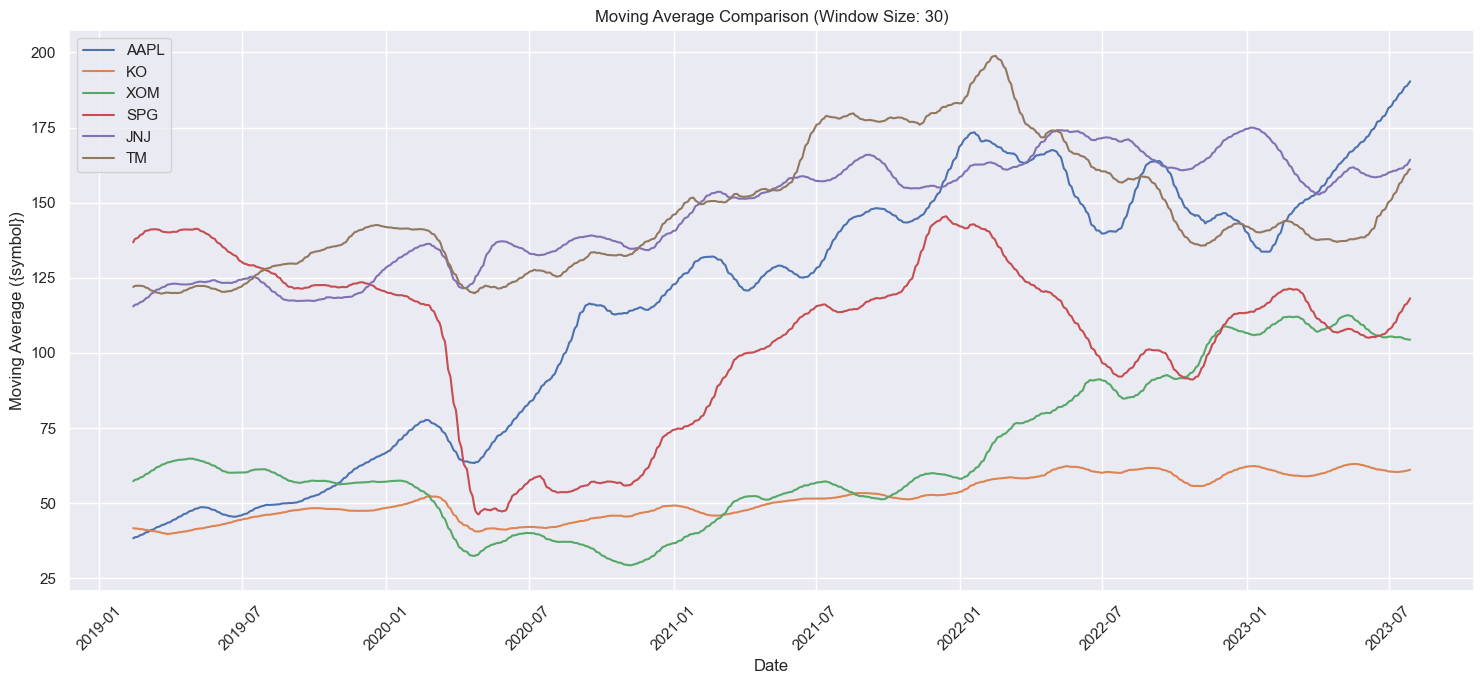

In [13]:
plt.figure(figsize=(15, 7))
for symbol, moving_average in moving_averages.items():
    plt.plot(moving_average, label=symbol)

plt.title(f"Moving Average Comparison (Window Size: {window_size})")
plt.xlabel("Date")
plt.ylabel("Moving Average ({symbol})")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

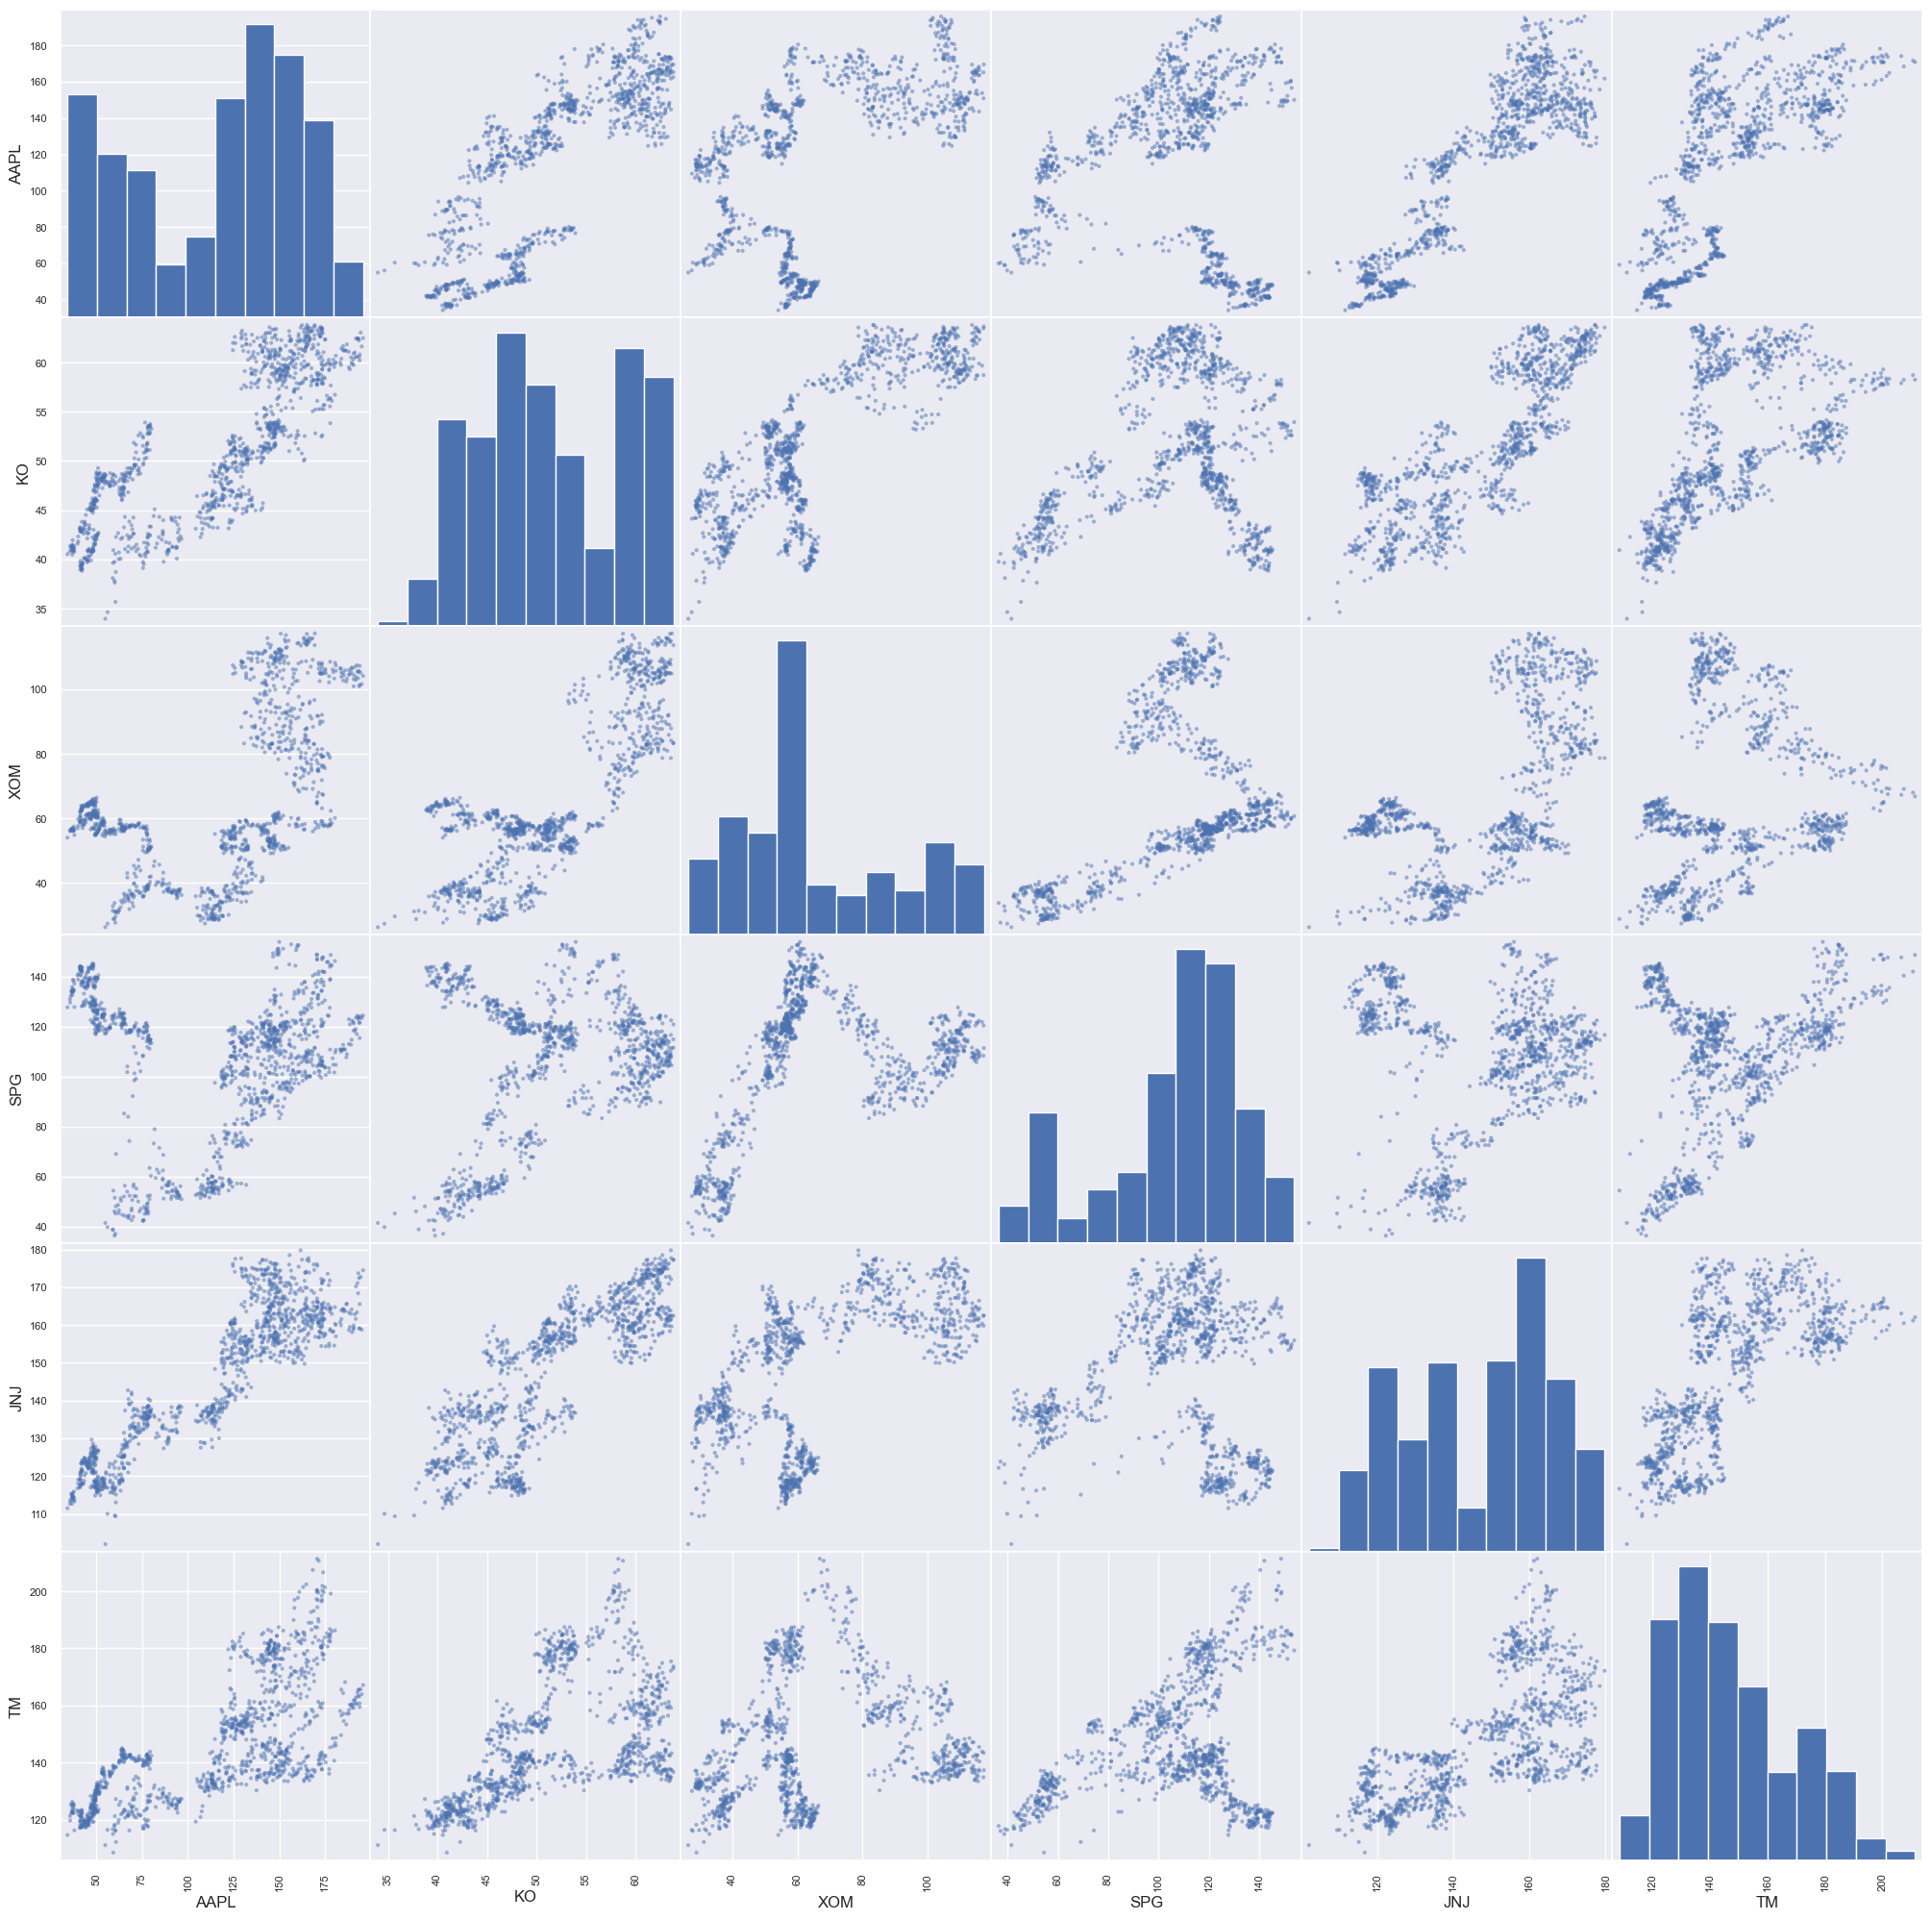

In [14]:
stock_data = {}
for symbol in ticker_symbols:
    ticker = yf.Ticker(symbol)
    stock_data[symbol] = ticker.history(start=start_date, end=end_date)["Close"]

# Concatenate the stock data into a single DataFrame
df = pd.concat(stock_data, axis=1)

# Plot the scatter matrix
pd_plot.scatter_matrix(df, figsize=(25, 25))
plt.show()

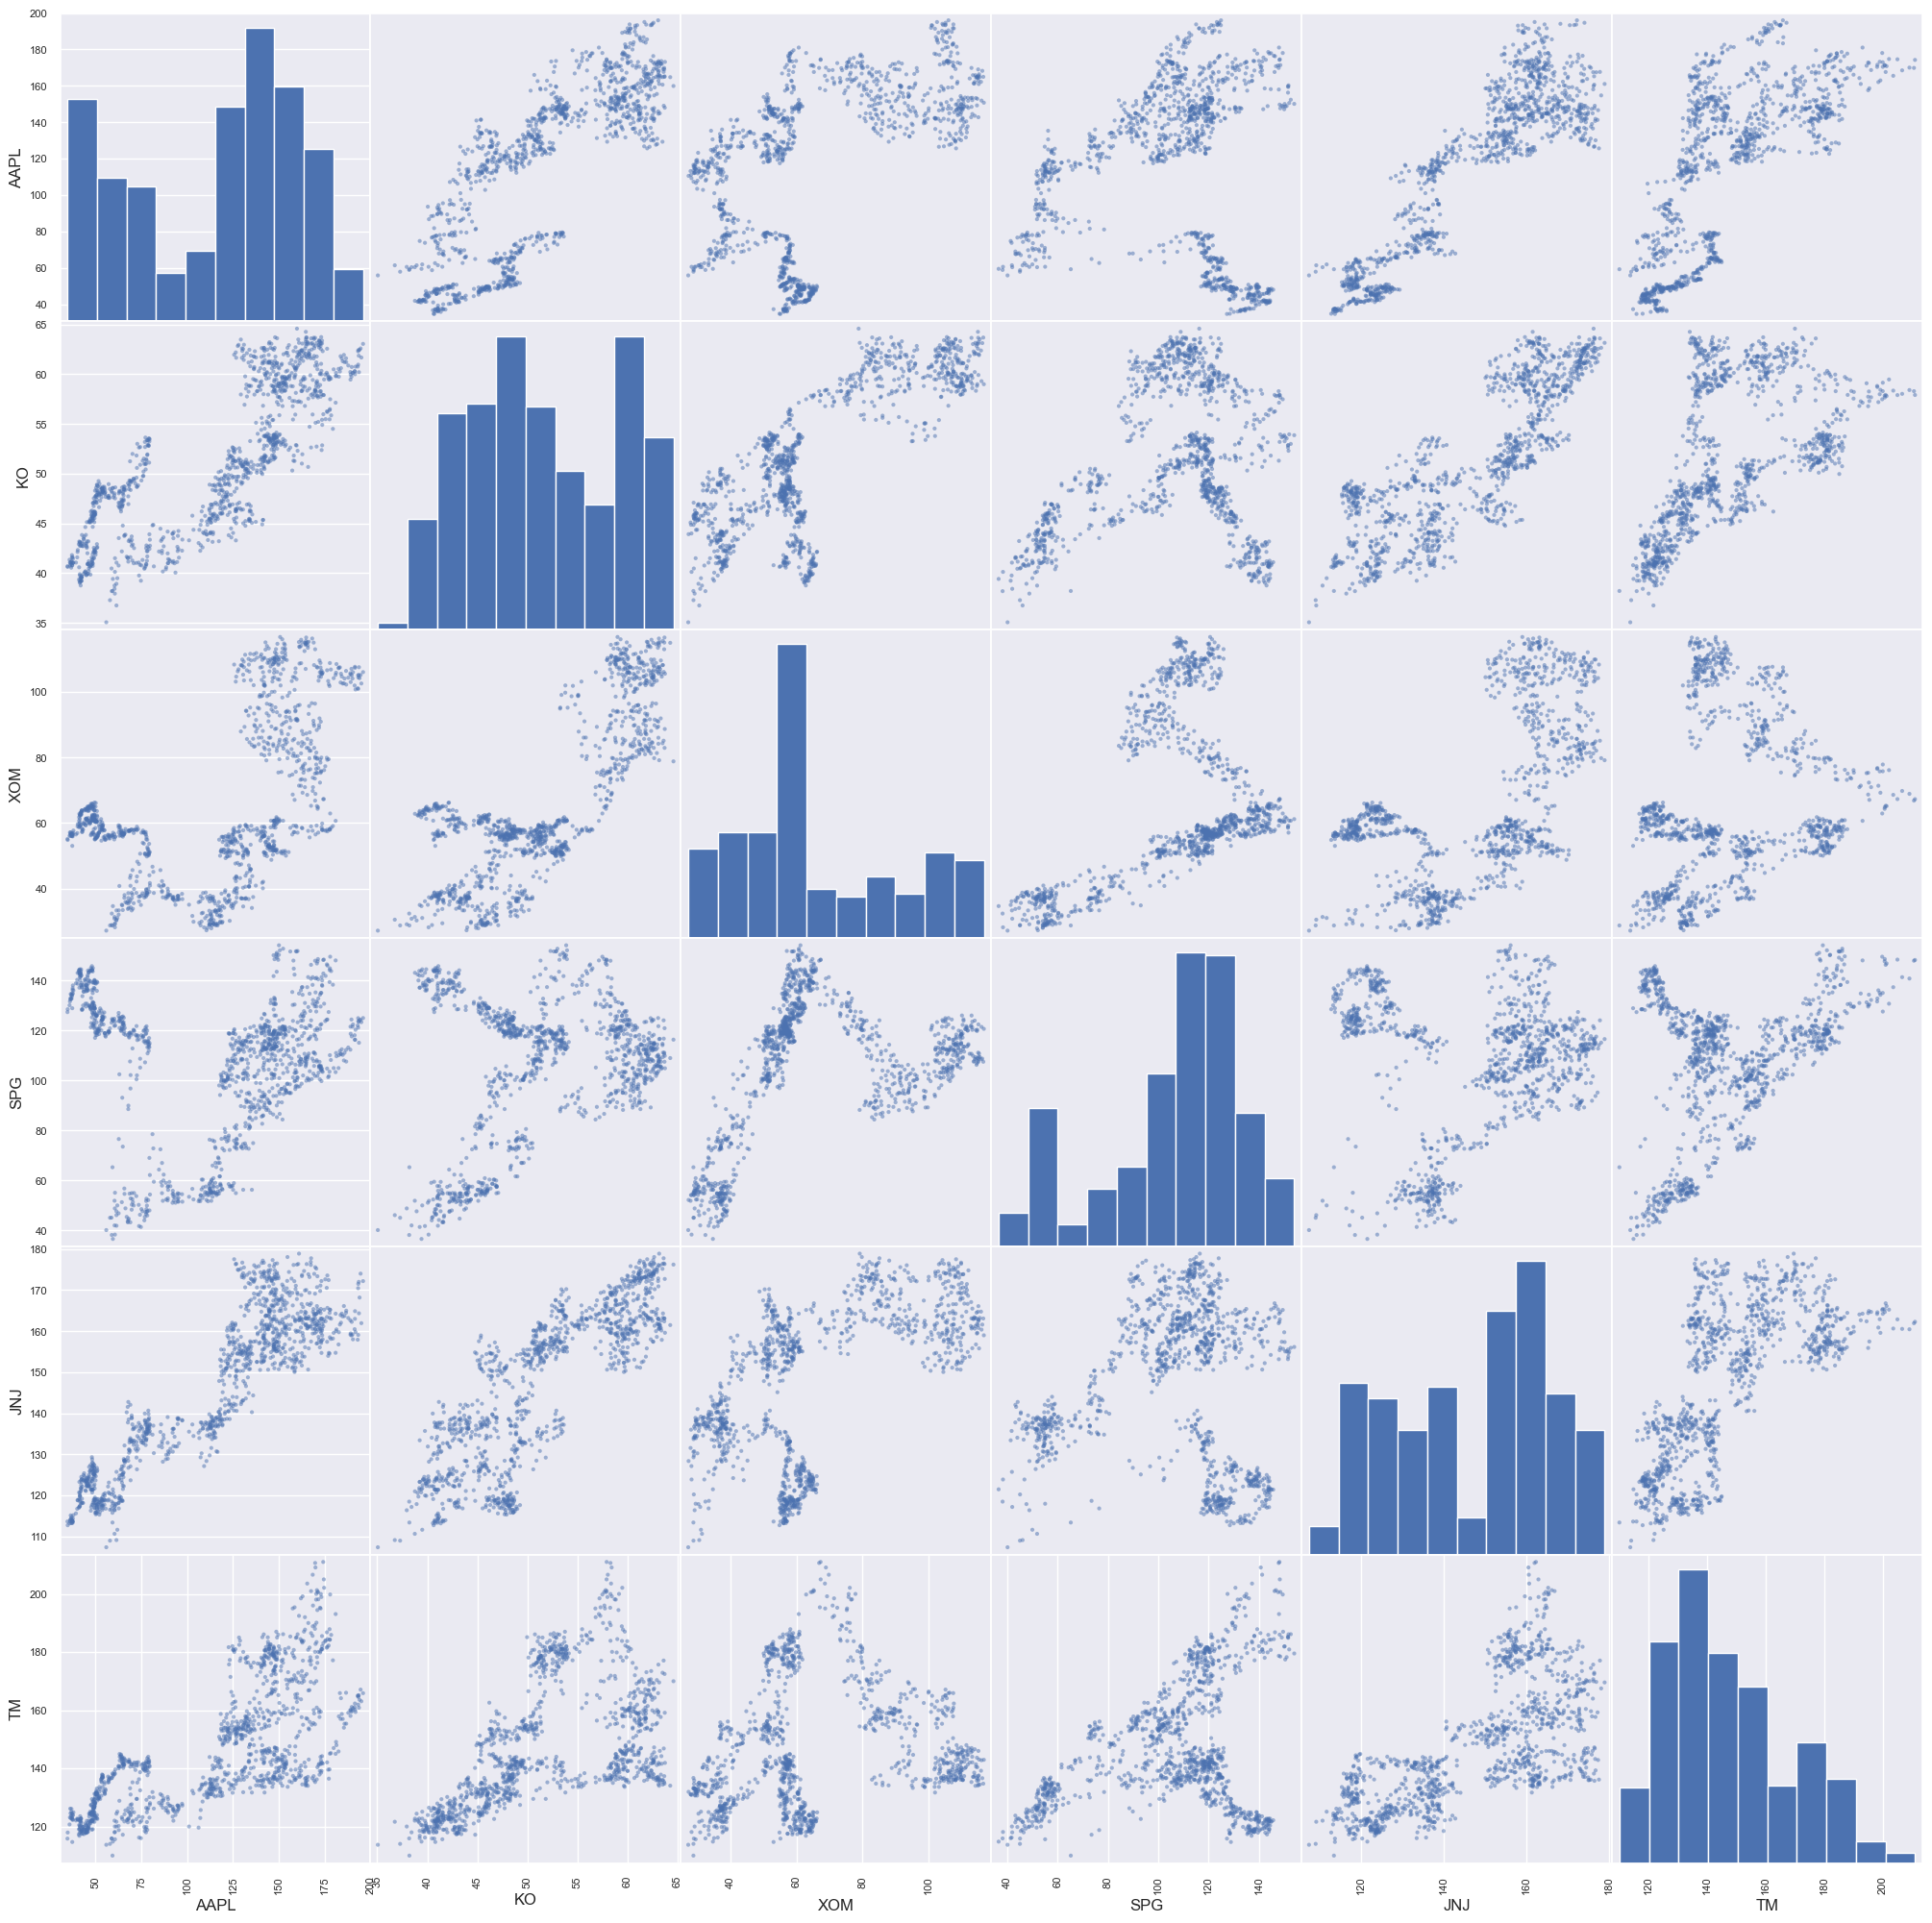

In [15]:
stock_data = {}
for symbol in ticker_symbols:
    ticker = yf.Ticker(symbol)
    stock_data[symbol] = ticker.history(start=start_date, end=end_date)["Open"]

# Concatenate the stock data into a single DataFrame
df = pd.concat(stock_data, axis=1)

# Plot the scatter matrix
pd_plot.scatter_matrix(df, figsize=(25, 25))
plt.show()

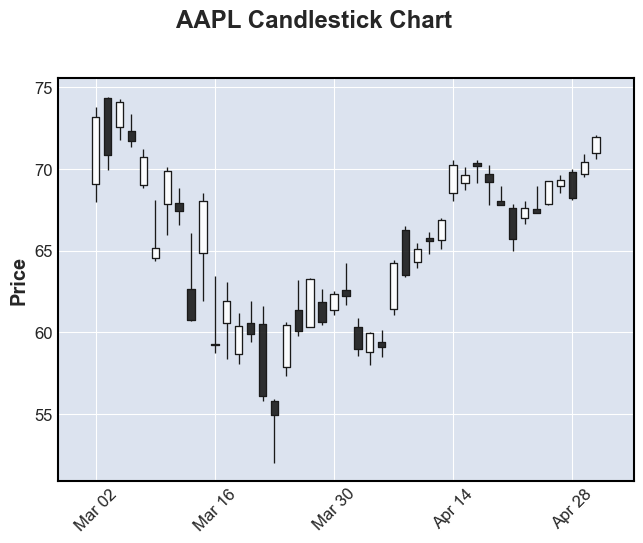

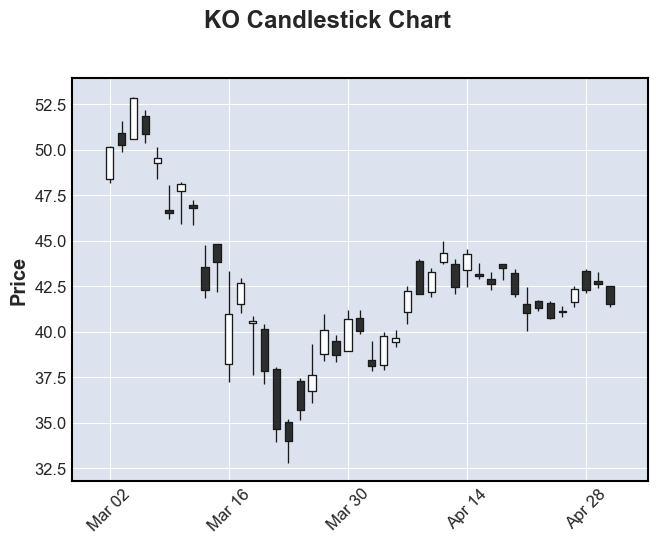

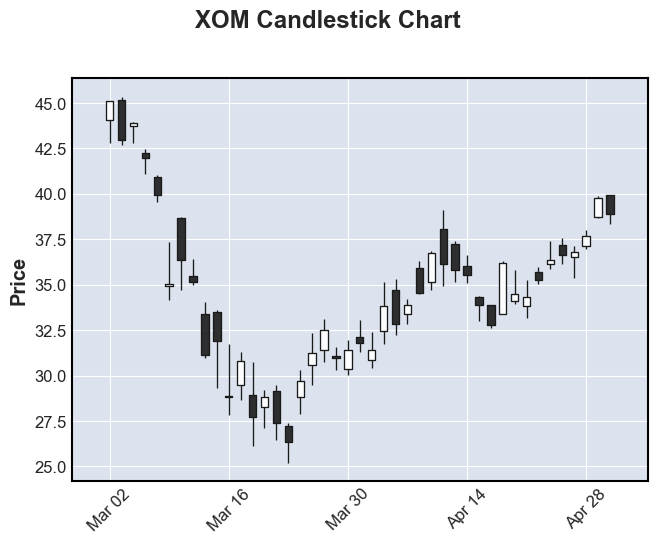

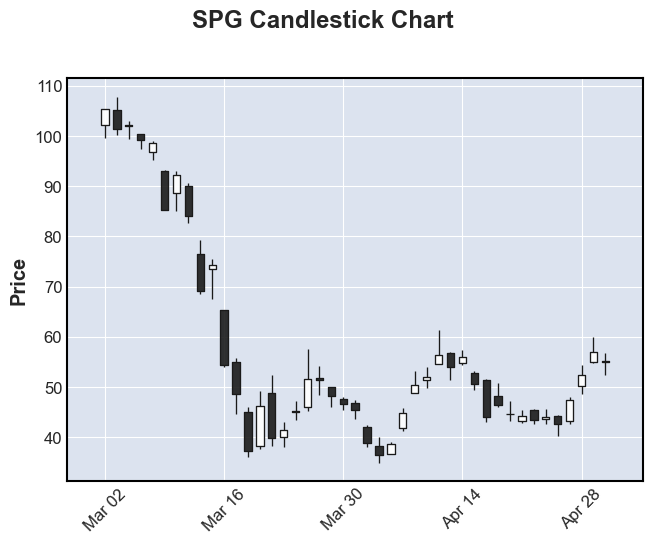

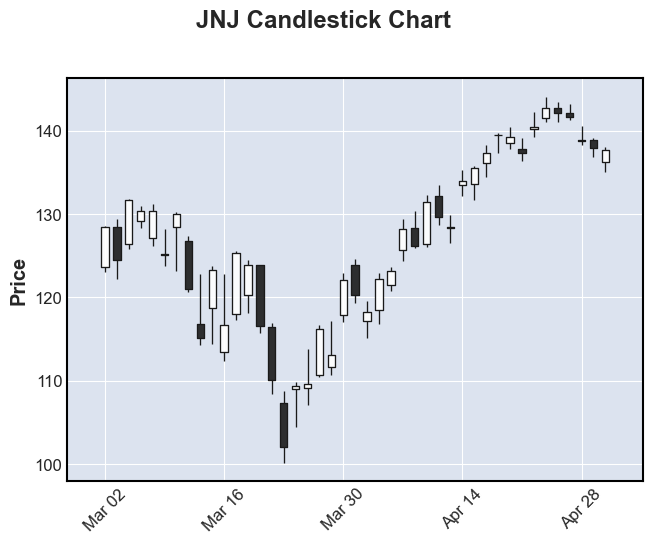

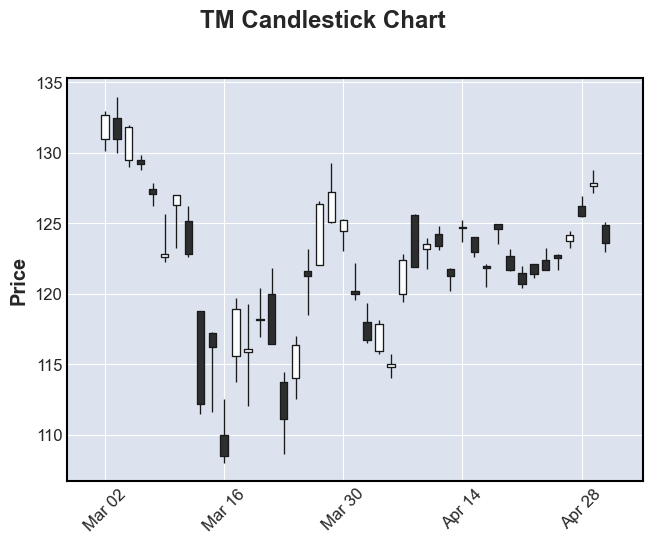

In [16]:
#Define the list of ticker symbols for the companies
ticker_symbols = ["AAPL", "KO", "XOM", "SPG", "JNJ", "TM"]

# Define the start and end dates for the desired period
start_date = "2020-03-01"
end_date = "2020-05-01"

# Create an empty dictionary to store the stock data for each company
stock_data = {}

# Retrieve the stock data for each ticker symbol and store it in the dictionary
for symbol in ticker_symbols:
    ticker = yf.Ticker(symbol)
    stock_data[symbol] = ticker.history(start=start_date, end=end_date)

for symbol, data in stock_data.items():
    mpf.plot(data, type="candle", title=f"{symbol} Candlestick Chart", ylabel="Price")

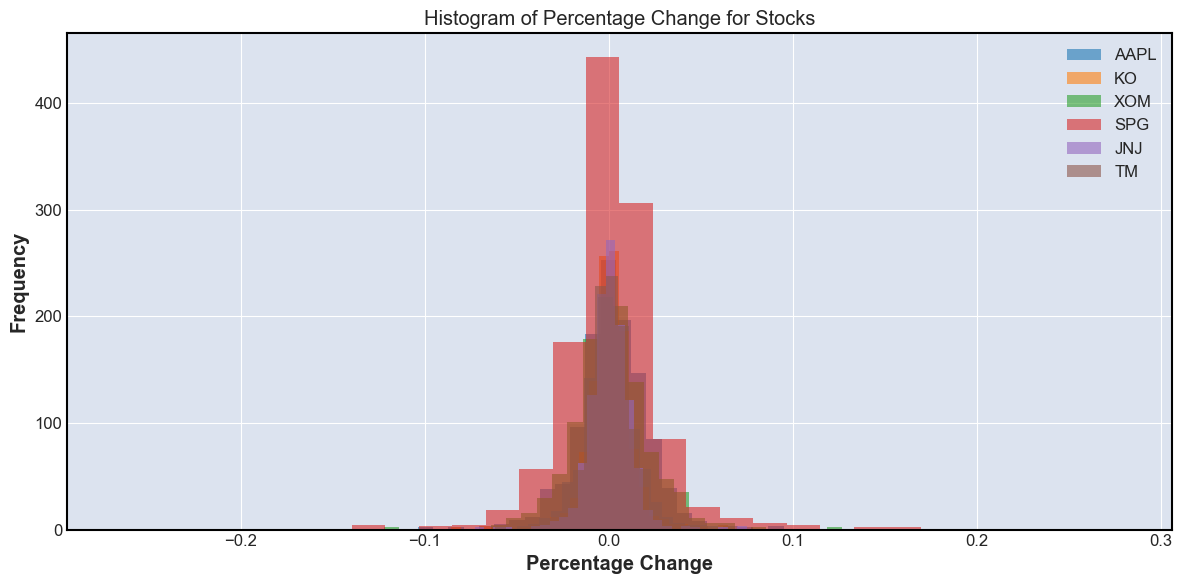

In [17]:
import matplotlib.pyplot as plt
import yfinance as yf

# Define the list of ticker symbols for the companies
ticker_symbols = ["AAPL", "KO", "XOM", "SPG", "JNJ", "TM"]
#ticker_symbols = ["AAPL", "KO", "XOM", "JNJ", "TM"]
# Define the start and end dates for the desired period
start_date = "2019-01-01"
end_date = "2023-12-31"

# Create an empty list to store the percentage changes
percentage_changes = []

# Retrieve the stock data for each ticker symbol and calculate the percentage change
for symbol in ticker_symbols:
    ticker = yf.Ticker(symbol)
    data = ticker.history(start=start_date, end=end_date)["Close"]
    percentage_change = data.pct_change().dropna()
    percentage_changes.append(percentage_change)

# Plot the histogram of percentage changes for each stock
plt.figure(figsize=(12, 6))
colors = plt.cm.tab10(range(len(ticker_symbols)))  # Generate a color map

for i, percentage_change in enumerate(percentage_changes):
    plt.hist(percentage_change, bins=30, alpha=0.6, color=colors[i], label=ticker_symbols[i])

plt.title("Histogram of Percentage Change for Stocks")
plt.xlabel("Percentage Change")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


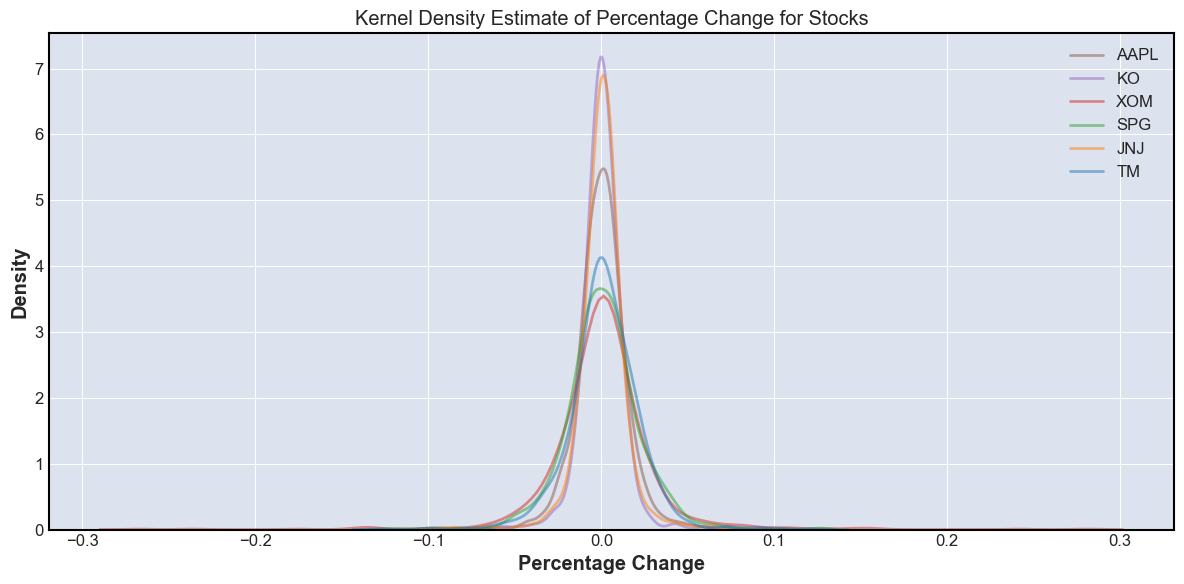

In [18]:
# Combine all percentage changes into a single DataFrame
combined_changes = pd.concat(percentage_changes, axis=1)
combined_changes.columns = ticker_symbols

# Create the KDE plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=combined_changes, fill=False, alpha=0.5)
plt.title("Kernel Density Estimate of Percentage Change for Stocks")
plt.xlabel("Percentage Change")
plt.ylabel("Density")
plt.legend(ticker_symbols)
plt.tight_layout()
plt.show()

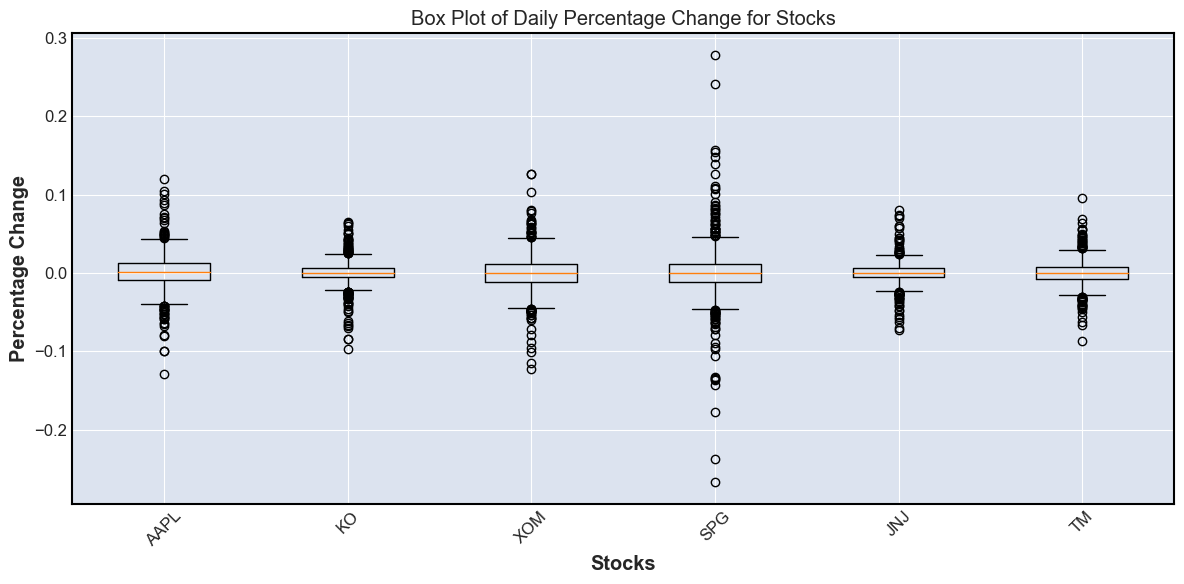

In [19]:
# Create the box plot of daily percentage change
plt.figure(figsize=(12, 6))
plt.boxplot(percentage_changes, labels=ticker_symbols)
plt.title("Box Plot of Daily Percentage Change for Stocks")
plt.xlabel("Stocks")
plt.ylabel("Percentage Change")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

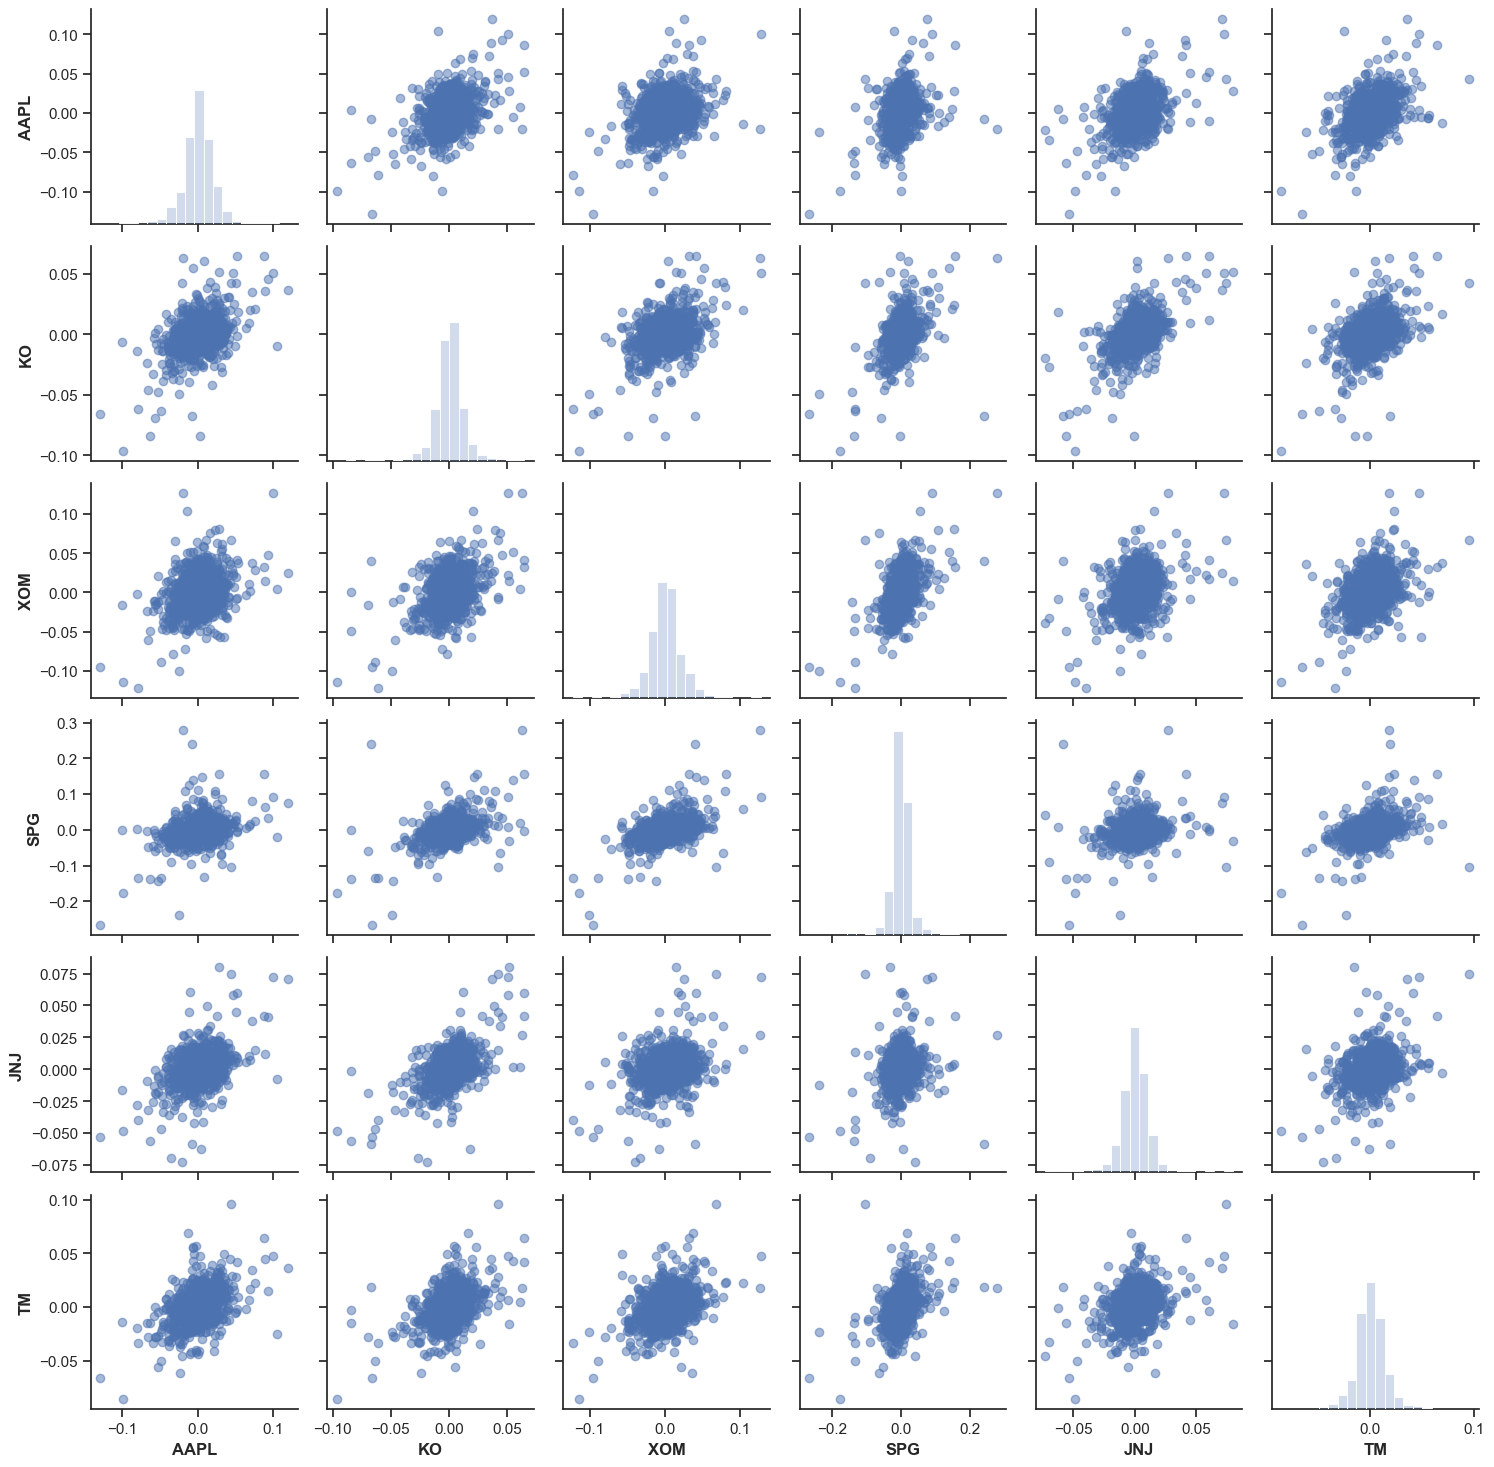

In [20]:
# Combine all percentage changes into a single DataFrame
df = pd.concat(percentage_changes, axis=1)
df.columns = ticker_symbols

# Create the scatter matrix
#pd_plot.scatter_matrix(df, figsize=(12, 12), diagonal='hist', bins=20, alpha=0.5)
#plt.tight_layout()
#plt.show()

#sns.set(style="ticks")
#sns.pairplot(df, kind="scatter", diag_kind="hist", bins=20, plot_kws={"alpha": 0.5})

# Create the scatter matrix with histograms
sns.set(style="ticks")
g = sns.PairGrid(df)
g.map_diag(sns.histplot, bins=20, alpha=0.25)
g.map_offdiag(plt.scatter, alpha=0.5)

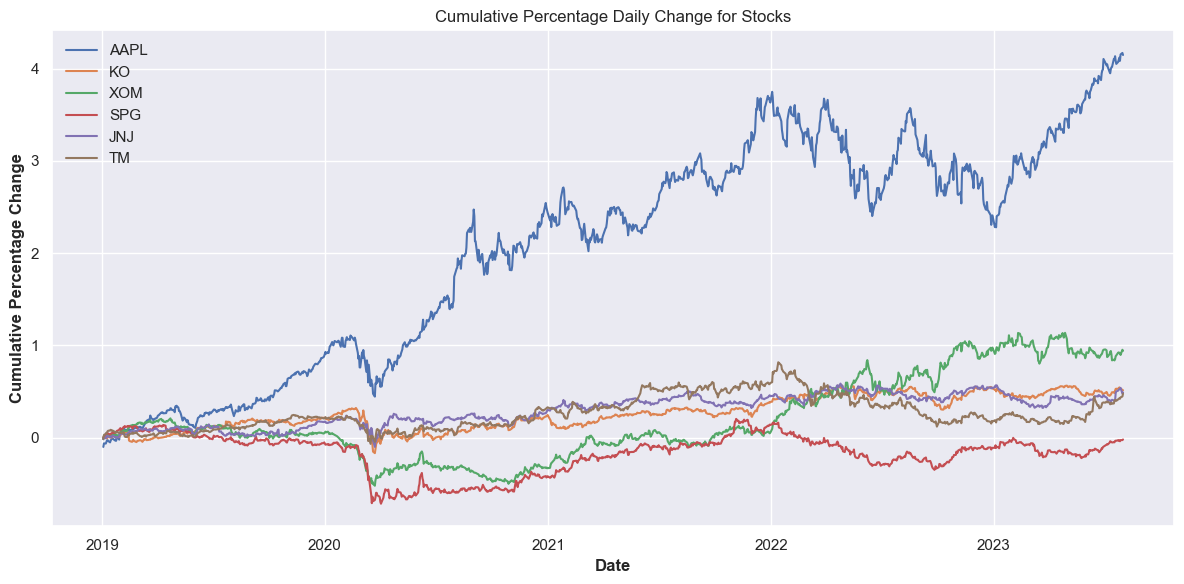

In [66]:
start_date = "2019-01-01"
end_date = "2023-12-31"

cumulative_changes = []
json_ready_data = {}
# Retrieve the stock data for each ticker symbol and calculate the percentage change
for symbol in ticker_symbols:
    ticker = yf.Ticker(symbol)
    data = ticker.history(start=start_date, end=end_date)["Close"]
    percentage_change = data.pct_change().dropna()
    cumulative_change = (1 + percentage_change).cumprod() - 1
    cumulative_changes.append(cumulative_change)

    # Extract the date and cumulative change from the cumulative_change Series
    dates = cumulative_change.index.strftime('%Y-%m').tolist()
    changes = cumulative_change.tolist()

     # Store the data as a list of dictionaries
    json_ready_data[symbol] = [{"date": date, "change": change} for date, change in zip(dates, changes)]


#####################################-- EXTRACT DATA FOR FLASK --##################################
# Convert the JSON-ready data to a JSON string
stock_data_json = json.dumps(json_ready_data)

# Write the JSON data to a JavaScript file
with open('./static/' +'cumulativeChange.js', 'w') as js_file:
    js_file.write(f'const stockData = {stock_data_json};')
###################################################################################################


# Plot the cumulative percentage daily change for all stocks
plt.figure(figsize=(12, 6))

for i, symbol in enumerate(ticker_symbols):
    plt.plot(cumulative_changes[i], label=symbol)

plt.title("Cumulative Percentage Daily Change for Stocks")
plt.xlabel("Date")
plt.ylabel("Cumulative Percentage Change")
plt.legend()
plt.tight_layout()
plt.show()
